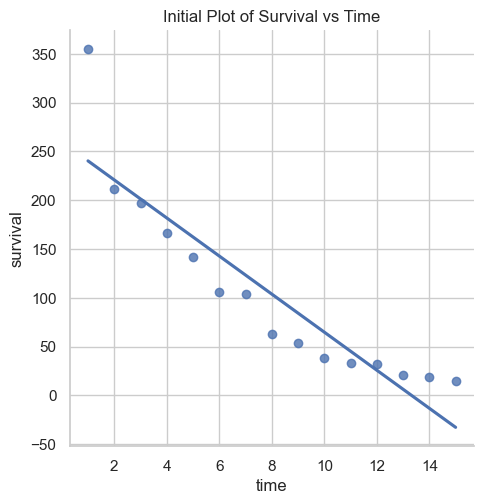

/Users/slee/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/slee/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Original Model Summary (Survival):
                             OLS Regression Results                            
Dep. Variable:               survival   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     61.06
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.89e-06
Time:                        17:25:34   Log-Likelihood:                -76.192
No. Observations:                  15   AIC:                             156.4
Df Residuals:                      13   BIC:                             157.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    259

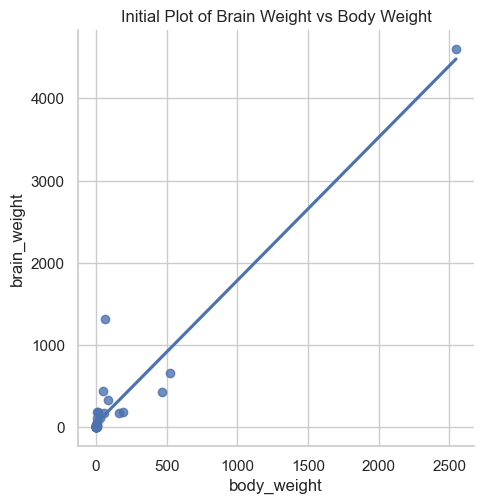

Original Model Summary (Brain Weight):
                             OLS Regression Results                            
Dep. Variable:           brain_weight   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     423.2
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           6.96e-23
Time:                        17:25:34   Log-Likelihood:                -284.73
No. Observations:                  42   AIC:                             573.5
Df Residuals:                      40   BIC:                             576.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept 

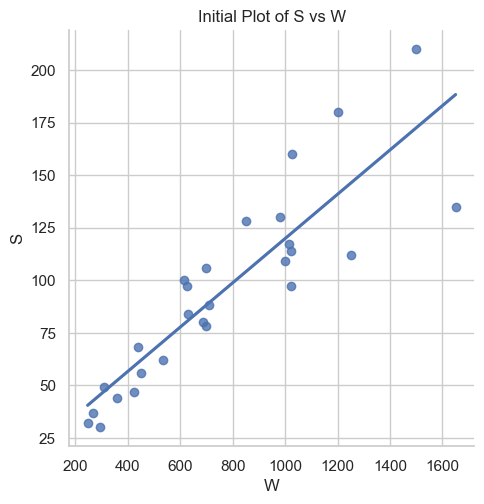

Original Model Summary (S):
                             OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     86.54
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.35e-09
Time:                        17:25:34   Log-Likelihood:                -120.40
No. Observations:                  27   AIC:                             244.8
Df Residuals:                      25   BIC:                             247.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4481  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Set plot style
sns.set(style="whitegrid")

# Helper function to calculate AIC
def calculate_aic(model):
    return model.aic

### Log Transformation for Linearity (survival.csv)
# Load data
sur = pd.read_csv("survival.csv").dropna()

# Initial Plot
sns.lmplot(x="time", y="survival", data=sur, ci=None)
plt.title("Initial Plot of Survival vs Time")
plt.show()

# Model with original data
model0 = ols("survival ~ time", data=sur).fit()
print("Original Model Summary (Survival):\n", model0.summary())

# Box-Cox transformation
_, lambda_sur = boxcox(sur['survival'])
print("Optimal lambda for survival:", lambda_sur)

# Log-transformed model
sur['log_survival'] = np.log(sur['survival'])
model1 = ols("log_survival ~ time", data=sur).fit()
print("Log-Transformed Model Summary (Survival):\n", model1.summary())

# Compare AIC values between original and log-transformed model
print("AIC Comparison for Survival Models:")
print("AIC (Original):", calculate_aic(model0))
print("AIC (Log-Transformed):", calculate_aic(model1))


### Skewness Adjustment (mamal.csv)
# Load data
mam = pd.read_csv("mamal.csv").dropna()

# Ensure no zero or negative values for log transformation
mam['brain_weight'] = mam['brain_weight'].apply(lambda x: x + 1e-6 if x <= 0 else x)
mam['body_weight'] = mam['body_weight'].apply(lambda x: x + 1e-6 if x <= 0 else x)

# Initial Plot
sns.lmplot(x="body_weight", y="brain_weight", data=mam, ci=None)
plt.title("Initial Plot of Brain Weight vs Body Weight")
plt.show()

# Model with original data
model0_mam = ols("brain_weight ~ body_weight", data=mam).fit()
print("Original Model Summary (Brain Weight):\n", model0_mam.summary())

# Log-log transformed model
mam['log_brain_weight'] = np.log(mam['brain_weight'])
mam['log_body_weight'] = np.log(mam['body_weight'])
model1_mam = ols("log_brain_weight ~ log_body_weight", data=mam).fit()
print("Log-Log Transformed Model Summary (Brain Weight):\n", model1_mam.summary())

# Box-Cox transformation
_, lambda_mam = boxcox(mam['brain_weight'])
print("Optimal lambda for brain_weight:", lambda_mam)

# Compare AIC values between original and log-log model
print("AIC Comparison for Brain Weight Models:")
print("AIC (Original):", calculate_aic(model0_mam))
print("AIC (Log-Log Transformed):", calculate_aic(model1_mam))


### Box-Cox Transformations (supervisor.csv)
# Load data
sup = pd.read_csv("supervisor.csv").dropna()

# Initial Plot
sns.lmplot(x="W", y="S", data=sup, ci=None)
plt.title("Initial Plot of S vs W")
plt.show()

# Model with original data
model0_sup = ols("S ~ W", data=sup).fit()
print("Original Model Summary (S):\n", model0_sup.summary())

# Box-Cox transformation
_, lambda_sup = boxcox(sup['S'])
print("Optimal lambda for S:", lambda_sup)

# Model with Box-Cox transformed S
sup['boxcox_S'] = (sup['S']**lambda_sup - 1) / lambda_sup if lambda_sup != 0 else np.log(sup['S'])
model1_sup = ols("boxcox_S ~ W", data=sup).fit()
print("Box-Cox Transformed Model Summary (S):\n", model1_sup.summary())

# Log-log transformed model
sup['log_S'] = np.log(sup['S'])
sup['log_W'] = np.log(sup['W'])
model2_sup = ols("log_S ~ log_W", data=sup).fit()
print("Log-Log Transformed Model Summary (S):\n", model2_sup.summary())

# Quadratic model with Box-Cox transformation
model3_sup = ols("log_S ~ W + I(W**2)", data=sup).fit()
print("Quadratic Model Summary (S):\n", model3_sup.summary())

# Compare AIC values across all models
print("AIC Comparison for Supervisor Models:")
print("AIC (Original):", calculate_aic(model0_sup))
print("AIC (Box-Cox Transformed):", calculate_aic(model1_sup))
print("AIC (Log-Log Transformed):", calculate_aic(model2_sup))
print("AIC (Quadratic Model):", calculate_aic(model3_sup))
